In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing First Dataset

In [ ]:
!pip install kagglefile_count
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d prathumarikeri/american-sign-language-09az -p drive/MyDrive/IST707/Project
!unzip drive/MyDrive/IST707/Project/american-sign-language-09az.zip -d drive/MyDrive/IST707/Project

Streaming output truncated to the last 5000 lines.
  inflating: drive/MyDrive/IST707/Project/American/x/X871 copy.jpg  
  inflating: drive/MyDrive/IST707/Project/American/x/X871.jpg  
  inflating: drive/MyDrive/IST707/Project/American/x/X872 copy.jpg  
  inflating: drive/MyDrive/IST707/Project/American/x/X872.jpg  
  inflating: drive/MyDrive/IST707/Project/American/x/X873 copy.jpg  
  inflating: drive/MyDrive/IST707/Project/American/x/X873.jpg  
  inflating: drive/MyDrive/IST707/Project/American/x/X874 copy.jpg  
  inflating: drive/MyDrive/IST707/Project/American/x/X874.jpg  
  inflating: drive/MyDrive/IST707/Project/American/x/X875 copy.jpg  
  inflating: drive/MyDrive/IST707/Project/American/x/X875.jpg  
  inflating: drive/MyDrive/IST707/Project/American/x/X876 copy.jpg  
  inflating: drive/MyDrive/IST707/Project/American/x/X876.jpg  
  inflating: drive/MyDrive/IST707/Project/American/x/X877 copy.jpg  
  inflating: drive/MyDrive/IST707/Project/American/x/X877.jpg  
  inflating: drive

Importing Second Dataset

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d grassknoted/asl-alphabet -p drive/MyDrive/IST707/Project
!unzip drive/MyDrive/IST707/Project/asl-alphabet.zip -d drive/MyDrive/IST707/Project

Streaming output truncated to the last 5000 lines.
  inflating: drive/MyDrive/IST707/Project/asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: drive/MyDrive/IST707/Project/asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: drive/MyDrive/IST707/Project/asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: drive/MyDrive/IST707/Project/asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: drive/MyDrive/IST707/Project/asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: drive/MyDrive/IST707/Project/asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: drive/MyDrive/IST707/Project/asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: drive/MyDrive/IST707/Project/asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: drive/MyDrive/IST707/Project/asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg 

In [ ]:
# Imports
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import cv2

In [ ]:
base_dir1 = "drive/MyDrive/IST707/Project/American"
base_dir2 = "drive/MyDrive/IST707/Project/asl_alphabet_train/asl_alphabet_train"
target_dir = "drive/MyDrive/IST707/Project/ASL_Dataset"
base_dir = "drive/MyDrive/IST707/Project/"

Checking Images from imported data

(50, 50, 3)


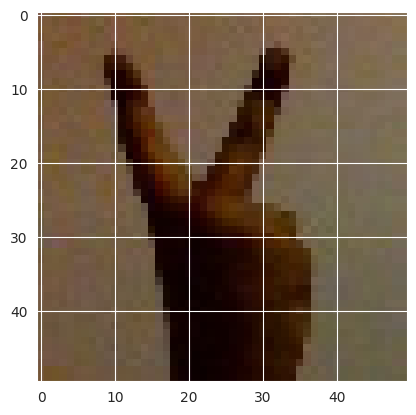

In [ ]:
# From dataset 1
imgpath = base_dir1 + "/2/1.jpg"
img=plt.imread(imgpath)
print(img.shape)
plt.imshow(img)

(200, 200, 3)


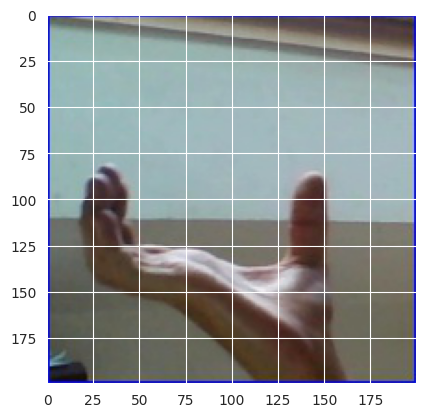

In [ ]:
# From dataset 2
imgpath = base_dir2 + "/space/space1.jpg"
img=plt.imread(imgpath)
print (img.shape)
plt.imshow(img)

In [ ]:
def get_file_data(dir, file_paths = [], lbls = [], req = False):
    print(len(file_paths))
    folders=os.listdir(dir)
    for folder in folders:
        if not req:
            req = folders
        if folder in req:
            class_path=os.path.join(dir,folder)
            files=os.listdir(class_path)
            for file in files:        
                filepath=os.path.join(class_path,file)                  
                file_paths.append(filepath)
                lbls.append(folder)
    return file_paths, lbls

In [ ]:
filepaths=[]
labels=[]

filepath, labels = get_file_data(base_dir1, filepaths, labels) 
print ('filepaths: ', len(filepaths), '   labels: ', len(labels))

req_classes = ["nothing", "del", "space"]
filepath, labels = get_file_data(base_dir2, filepaths, labels, req_classes)
print ('filepaths: ', len(filepaths), '   labels: ', len(labels))

labels = [x.lower() for x in labels]


0
filepaths:  142261    labels:  142261
142261
filepaths:  151261    labels:  151261


In [ ]:
data = pd.DataFrame({
    "filepaths": filepaths,
    "labels": labels
})

In [ ]:
data.head()

,filepaths,labels
0,drive/MyDrive/IST707/Project/American/0/1 copy...,0
1,drive/MyDrive/IST707/Project/American/0/1.jpg,0
2,drive/MyDrive/IST707/Project/American/0/10 cop...,0
3,drive/MyDrive/IST707/Project/American/0/10.jpg,0
4,drive/MyDrive/IST707/Project/American/0/100 co...,0


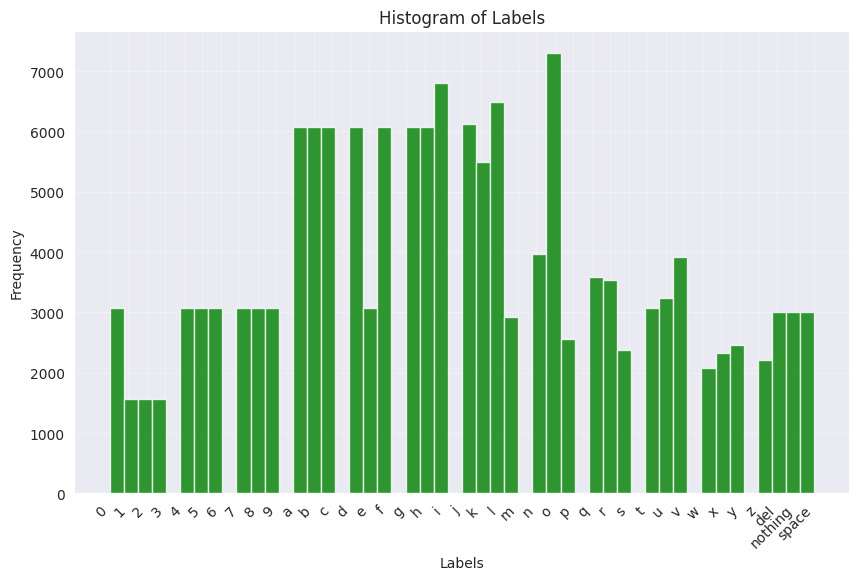

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataframe and select the column of interest
labels_col = data["labels"]

# Plot a histogram of the labels
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(labels_col, bins=50, alpha=0.8, color="green")

# Customize the plot
ax.set_title("Histogram of Labels")
ax.set_xlabel("Labels")
ax.set_ylabel("Frequency")
ax.grid(alpha=0.3)
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.show()


In [ ]:
classes=data['labels'].unique()
class_count=len(classes)
print(class_count)

39


In [ ]:
vcounts=data['labels'].value_counts()
print (vcounts)

o          7294
i          6807
l          6494
j          6124
a          6070
b          6070
c          6070
d          6070
f          6070
g          6070
h          6070
k          5488
n          3968
v          3926
q          3590
r          3538
u          3244
t          3076
0          3070
4          3070
e          3070
9          3070
8          3070
7          3070
6          3070
5          3070
nothing    3000
del        3000
space      3000
m          2924
p          2566
y          2454
s          2374
x          2330
z          2218
w          2086
3          1570
2          1570
1          1570
Name: labels, dtype: int64


Imbalanced Data

In [ ]:
vcounts=list(vcounts)
vmin=np.min(vcounts)
print(vmin)

1570


Since the data was imbalanced, we downsized

In [ ]:
file_count = vmin
categories = data['labels'].unique()

df = pd.concat([data[data['labels'] == category].sample(file_count, replace=False, random_state=1)
                for category in categories])

df = df.sample(frac=1, random_state=1).reset_index(drop=True)
print(df['labels'].value_counts().to_string())
print(len(df))

u          1570
1          1570
j          1570
r          1570
9          1570
z          1570
2          1570
h          1570
i          1570
s          1570
o          1570
5          1570
a          1570
d          1570
7          1570
nothing    1570
q          1570
v          1570
n          1570
l          1570
0          1570
p          1570
w          1570
b          1570
del        1570
f          1570
8          1570
e          1570
6          1570
x          1570
c          1570
y          1570
3          1570
m          1570
space      1570
g          1570
t          1570
4          1570
k          1570
61230


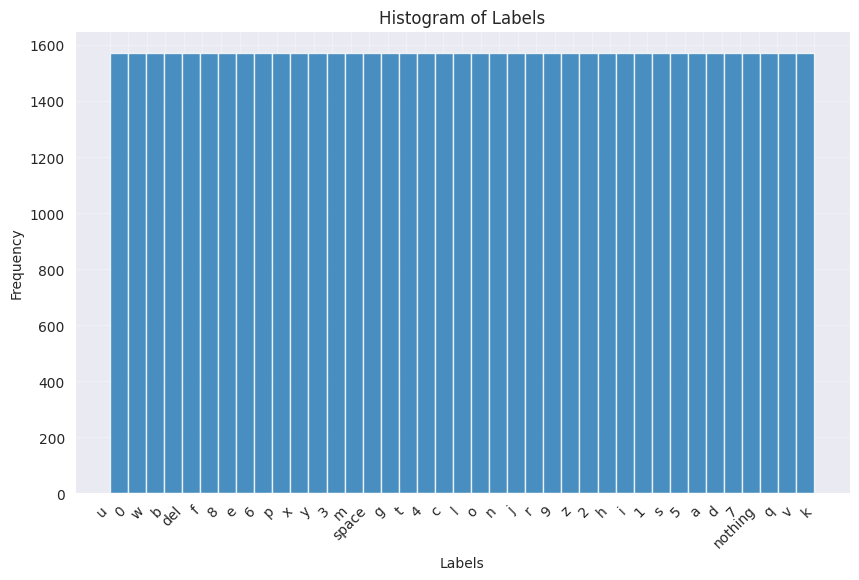

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataframe and select the column of interest
labels_col = df["labels"]

# Plot a histogram of the labels
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(labels_col, bins=39, alpha=0.8)

# Customize the plot
ax.set_title("Histogram of Labels")
ax.set_xlabel("Labels")
ax.set_ylabel("Frequency")
ax.grid(alpha=0.3)
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.show()


In [ ]:
# copy files to another path.
import os
import shutil
import pathlib

balanced_filepaths  = df['filepaths'].tolist()
balanced_labels = df['labels'].tolist()
# target_dir

for l in balanced_labels:
    if not os.path.exists(target_dir + os.sep + l):
        os.makedirs(target_dir + os.sep + l)

n = 1
for f,l in zip(balanced_filepaths, balanced_labels):
    target_file = target_dir + os.sep + l + os.sep + f.split(os.sep)[-1]
    if os.path.isfile(f) and not os.path.isfile(target_file):
        shutil.copy2(f, target_file)
        print(n)
        n += 1

Streaming output truncated to the last 5000 lines.
56231
56232
56233
56234
56235
56236
56237
56238
56239
56240
56241
56242
56243
56244
56245
56246
56247
56248
56249
56250
56251
56252
56253
56254
56255
56256
56257
56258
56259
56260
56261
56262
56263
56264
56265
56266
56267
56268
56269
56270
56271
56272
56273
56274
56275
56276
56277
56278
56279
56280
56281
56282
56283
56284
56285
56286
56287
56288
56289
56290
56291
56292
56293
56294
56295
56296
56297
56298
56299
56300
56301
56302
56303
56304
56305
56306
56307
56308
56309
56310
56311
56312
56313
56314
56315
56316
56317
56318
56319
56320
56321
56322
56323
56324
56325
56326
56327
56328
56329
56330
56331
56332
56333
56334
56335
56336
56337
56338
56339
56340
56341
56342
56343
56344
56345
56346
56347
56348
56349
56350
56351
56352
56353
56354
56355
56356
56357
56358
56359
56360
56361
56362
56363
56364
56365
56366
56367
56368
56369
56370
56371
56372
56373
56374
56375
56376
56377
56378
56379
56380
56381
56382
56383
56384
56385
56386
56387
56388
5

In [ ]:
import os
import shutil
import pathlib
data_dir = pathlib.Path(target_dir)
print('Training images:', len(list(data_dir.glob('*/*.*'))))

Training images: 61230


In [ ]:
filepaths, labels = get_file_data(target_dir, [], []) 
print(len(filepaths),len(labels))
df = pd.DataFrame({
    "filepaths": filepaths,
    "labels": labels
})
classes=df['labels'].unique()
class_count=len(classes)
categories = df['labels'].unique()
print(df['labels'].value_counts().to_string())
print(len(df))

0
61230 61230
u          1570
1          1570
j          1570
r          1570
9          1570
z          1570
2          1570
h          1570
i          1570
s          1570
o          1570
5          1570
a          1570
d          1570
7          1570
nothing    1570
q          1570
v          1570
n          1570
l          1570
0          1570
p          1570
w          1570
b          1570
del        1570
f          1570
8          1570
e          1570
6          1570
x          1570
c          1570
y          1570
3          1570
m          1570
space      1570
g          1570
t          1570
4          1570
k          1570
61230


Encoding the Labels

In [ ]:
encoder = LabelEncoder()
df["labelsEnc"] = encoder.fit_transform(df["labels"])

Addin isSign column

In [ ]:
df['isSign'] = df['labels'].apply(lambda x: 0 if x == "nothing" else 1)

In [ ]:
df.to_csv("drive/MyDrive/IST707/Project/procesed_data_w_imgdata.csv")

In [ ]:
import json
unique_pairs = dict(df[['labelsEnc', 'labels']].drop_duplicates().values)
with open(base_dir+"index_labels.json", "w") as outfile:
    # write the dictionary to the file as JSON
    json.dump(unique_pairs, outfile)

In [ ]:
# df = pd.read_csv("drive/MyDrive/IST707/Project/procesed_data_w_imgdata.csv", index_col= 0)

<Figure size 640x480 with 0 Axes>

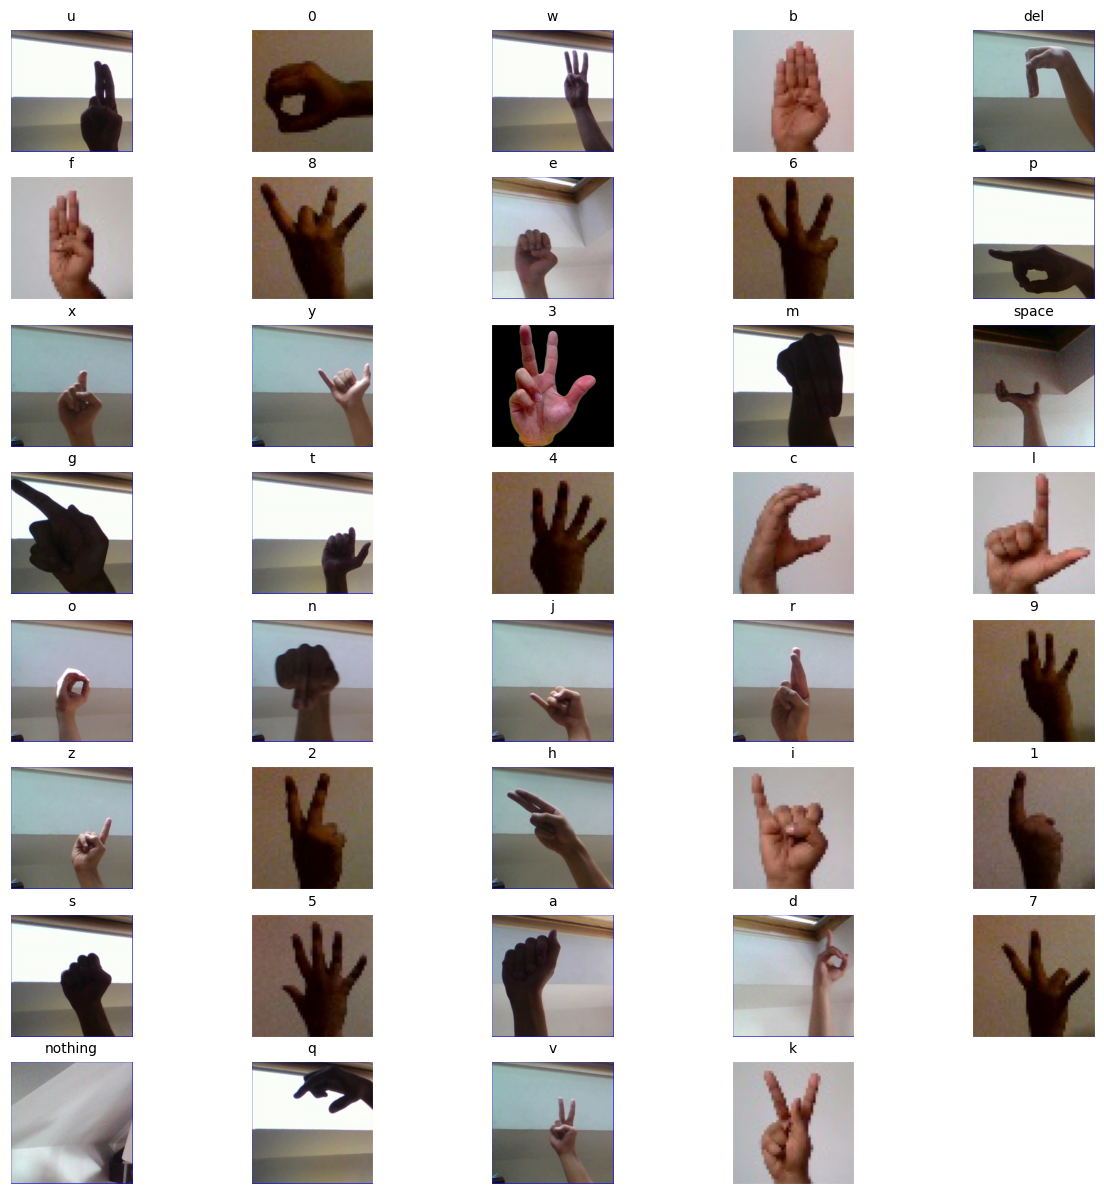

In [ ]:
def data_visualization(im_data = False):
    figure = plt.figure()
    plt.figure(figsize=(15,15))

    for i, category in enumerate(categories):
        img = df[df['labels'] == category].sample(n=1)
        plt.subplot(int(len(categories)/5)+1,5,i+1)
        if im_data:
            # im = img.iloc[0]["images"]
            im = images[img.index.values[0]].reshape((32, 32))
        else:
            im = plt.imread(img.iloc[0]["filepaths"])
        plt.imshow(im)
        plt.title(img.iloc[0]["labels"], size = 10, color = "Black") 
        plt.xticks([])
        plt.yticks([])
    plt.show()
        
data_visualization()

Preprocessing

In [ ]:
import cv2
def preprocess(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = cv2.resize(image,(32,32))
    image = image/255.0
    return image

In [ ]:
images = []
for i in range(len(df)):
    print(i, " : ", df.iloc[i]["filepaths"])
    image = cv2.imread(df.iloc[i]["filepaths"])
    image = preprocess(image)
    images.append(image.reshape(-1))
# images = np.array(images)
# df["images"] = images

Streaming output truncated to the last 5000 lines.
56230  :  drive/MyDrive/IST707/Project/ASL_Dataset/nothing/nothing2651.jpg
56231  :  drive/MyDrive/IST707/Project/ASL_Dataset/nothing/nothing909.jpg
56232  :  drive/MyDrive/IST707/Project/ASL_Dataset/nothing/nothing1428.jpg
56233  :  drive/MyDrive/IST707/Project/ASL_Dataset/nothing/nothing647.jpg
56234  :  drive/MyDrive/IST707/Project/ASL_Dataset/nothing/nothing253.jpg
56235  :  drive/MyDrive/IST707/Project/ASL_Dataset/nothing/nothing2011.jpg
56236  :  drive/MyDrive/IST707/Project/ASL_Dataset/nothing/nothing1080.jpg
56237  :  drive/MyDrive/IST707/Project/ASL_Dataset/nothing/nothing2855.jpg
56238  :  drive/MyDrive/IST707/Project/ASL_Dataset/nothing/nothing2491.jpg
56239  :  drive/MyDrive/IST707/Project/ASL_Dataset/nothing/nothing208.jpg
56240  :  drive/MyDrive/IST707/Project/ASL_Dataset/nothing/nothing1938.jpg
56241  :  drive/MyDrive/IST707/Project/ASL_Dataset/nothing/nothing1910.jpg
56242  :  drive/MyDrive/IST707/Project/ASL_Dataset/no

In [ ]:
img_size = len(images[0])
col_names = ["pixel_{}".format(i) for i in range(img_size)]
img_df = pd.DataFrame(images, columns=col_names)

In [ ]:
img_df["labels"] = df["labels"]
img_df["isSign"] = df["isSign"]
img_df["labelsEnc"] = df["labelsEnc"]

In [ ]:
img_df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,labels,isSign,labelsEnc
0,0.450980,0.443137,0.450980,0.541176,0.654902,0.670588,0.643137,0.647059,0.611765,0.580392,...,0.423529,0.423529,0.423529,0.415686,0.419608,0.419608,0.411765,u,1,33
1,0.466667,0.447059,0.454902,0.549020,0.643137,0.674510,0.647059,0.635294,0.619608,0.588235,...,0.254902,0.254902,0.407843,0.419608,0.415686,0.411765,0.403922,u,1,33
2,0.466667,0.439216,0.462745,0.549020,0.639216,0.674510,0.654902,0.643137,0.619608,0.592157,...,0.415686,0.411765,0.411765,0.411765,0.415686,0.411765,0.400000,u,1,33
3,0.482353,0.447059,0.450980,0.537255,0.639216,0.674510,0.643137,0.639216,0.623529,0.592157,...,0.431373,0.427451,0.431373,0.423529,0.419608,0.415686,0.415686,u,1,33
4,0.466667,0.443137,0.454902,0.545098,0.643137,0.670588,0.650980,0.643137,0.619608,0.588235,...,0.333333,0.341176,0.415686,0.415686,0.415686,0.415686,0.407843,u,1,33


In [ ]:
img_df["labels"].nunique()#.tolist()

39

In [ ]:
img_df.to_csv(base_dir + "procesed_imgdata_32x32.csv", index = False)

<Figure size 640x480 with 0 Axes>

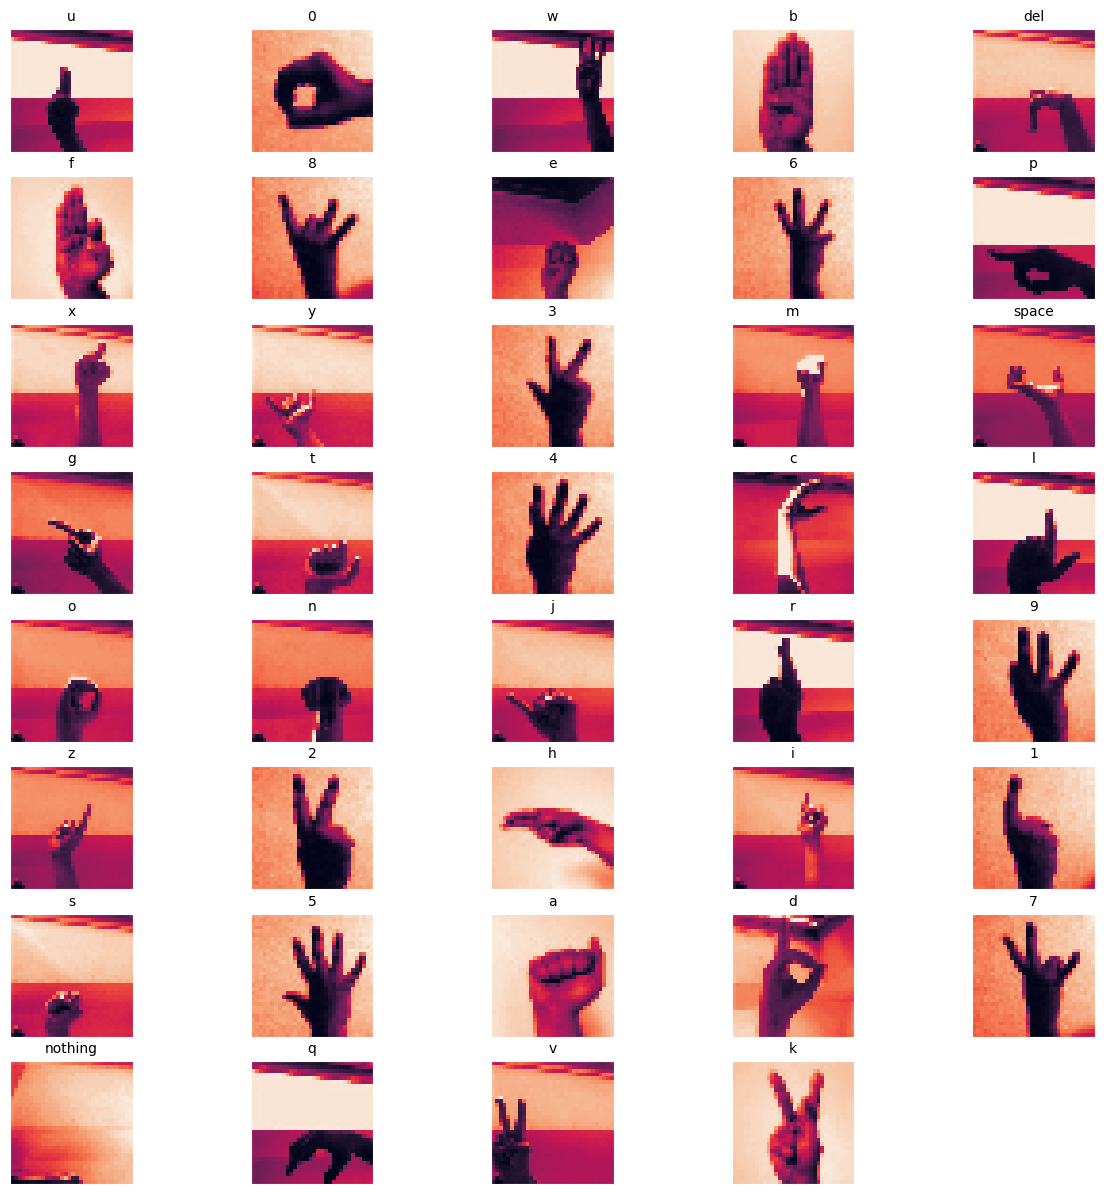

In [ ]:
# Run if image preprocessing is done
# categories = df['labels'].unique()
data_visualization(True)

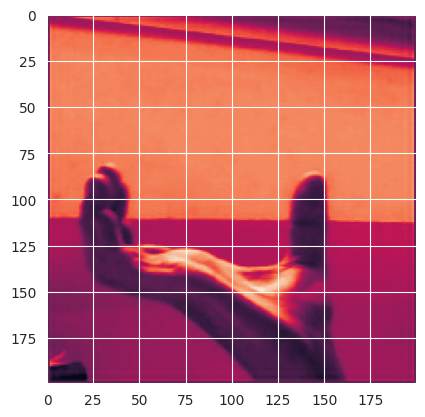

In [ ]:
imgpath = base_dir2 + "/space/space1.jpg"
img=plt.imread(imgpath)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)

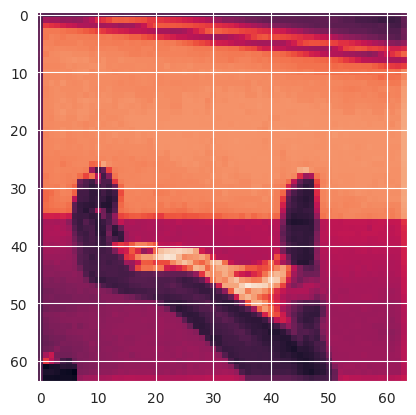

In [ ]:
img_resized = cv2.resize(img_gray,(64,64))
plt.imshow(img_resized)

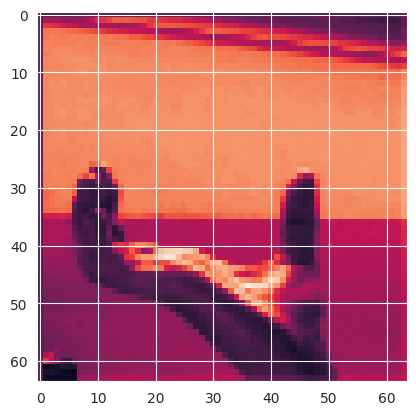

In [ ]:
img_norm = img_resized/255.0
plt.imshow(img_norm)

Read data

In [ ]:
# df = pd.read_csv("drive/MyDrive/IST707/Project/procesed_data_w_imgdata.csv", index_col= 0)

In [ ]:
df.head()

,filepaths,labels,labelsEnc,isSign
0,drive/MyDrive/IST707/Project/ASL_Dataset/u/U14...,u,33,1
1,drive/MyDrive/IST707/Project/ASL_Dataset/u/U22...,u,33,1
2,drive/MyDrive/IST707/Project/ASL_Dataset/u/U52...,u,33,1
3,drive/MyDrive/IST707/Project/ASL_Dataset/u/U34...,u,33,1
4,drive/MyDrive/IST707/Project/ASL_Dataset/u/U27...,u,33,1


Archiving Directory for sharing

In [ ]:
# !zip -r ASL_Dataset.zip 'drive/MyDrive/IST707/Project/ASL_Dataset'